**Model Selection - NN**

Model selection process can also be used when choosing between different neural network architectures.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu

In [38]:
data = np.loadtxt(r"C:\Users\ABHIJITH\Downloads\data_w3_ex1.csv",delimiter=',')
print(data.shape)

(50, 2)


In [39]:
x = data[:,0]
y = data[:,1]

In [40]:
x = np.expand_dims(x,axis=1)
y = np.expand_dims(y,axis=1)
print(x.shape, y.shape)

(50, 1) (50, 1)


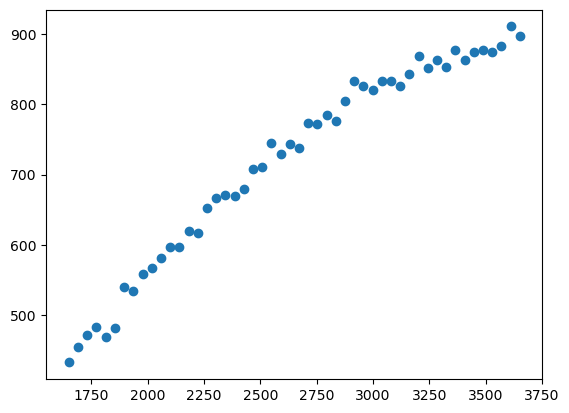

In [41]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [42]:
x_train, x_, y_train, y_ = train_test_split(x,y,test_size = 0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_,y_, test_size=0.5, random_state=1)
del x_,y_

In [43]:
print(x_train.shape,x_cv.shape,x_test.shape)
print(y_train.shape,y_cv.shape,y_test.shape)

(30, 1) (10, 1) (10, 1)
(30, 1) (10, 1) (10, 1)


In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

In [50]:
model_1 = Sequential(
    [
        Dense(25,activation='relu'),
        Dense(15,activation='relu'),
        Dense(1,activation='linear')
    ], name = 'model_1'
)

model_2 = Sequential(
    [
        Dense(20, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ], name='model_2'
)

model_3 = Sequential(
    [
        Dense(32, activation = 'relu'),
        Dense(16, activation = 'relu'),
        Dense(8, activation = 'relu'),
        Dense(4, activation = 'relu'),
        Dense(12, activation = 'relu'),
        Dense(1, activation = 'linear')
    ], name = 'model_3'
)

In [51]:
models = [model_1,model_2,model_3]

In [53]:
train_mses = []
cv_mses = []

for model in models:

    model.compile(
        loss =  'mse',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    )

    print(f"Training {model.name}")   

    model.fit(
        x_train_scaled,y_train,epochs=300,verbose=0
        )
    
    print("Done")

    yhat_train = model.predict(x_train_scaled)
    train_mse = mean_squared_error(y_train,yhat_train) / 2
    train_mses.append(train_mse)

    yhat_cv = model.predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv,yhat_cv) / 2
    cv_mses.append(cv_mse)


print("Results")

for model_num in range(len(train_mses)):
    print(
        f"Model {model_num +1}: Training MSE: {train_mses[model_num]: .2f}," +
        f"CV MSE: {cv_mses[model_num]: .2f}"
          )


Training model_1
Done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Training model_2
Done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Training model_3
Done
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Results
Model 1: Training MSE:  161108.33,CV MSE:  199647.12
Model 2: Training MSE:  845.37,CV MSE:  959.69
Model 3: Training MSE:  592.87,CV MSE:  743.36


In [54]:
#model with lowest mse
model_number = 3

yhat_test = models[model_number-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test,yhat_test) / 2

print(f"Selected model: {model_number}")
print(f"Training MSE: {train_mses[model_number-1]: .2f}")
print(f"CV MSE: {cv_mses[model_number-1]: .2f}")
print(f"Test MSE: {test_mse: .2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Selected model: 3
Training MSE:  592.87
CV MSE:  743.36
Test MSE:  936.62
